<a href="https://colab.research.google.com/github/AjmiyaSalim/telco-churn-prediction/blob/main/Customer_Churn_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to XGBoost

XGBoost (Extreme Gradient Boosting) is a powerful and efficient machine learning algorithm based on the gradient boosting framework. It is widely used for classification, regression, and ranking tasks because of its high performance, speed, and accuracy.

The main idea behind XGBoost is to build an **ensemble of decision trees**, where each new tree corrects the errors made by the previous ones. It uses gradient descent to minimize the loss function and applies techniques like **regularization**, **parallel processing**, and **missing value handling** to improve model performance and prevent overfitting.

Key advantages of XGBoost:
- **High accuracy** – often outperforms other algorithms.
- **Fast training** – optimized for speed and efficiency.
- **Handles missing data** automatically.
- **Regularization** to reduce overfitting.
- **Supports both classification and regression** problems.



## Introduction to Data

Customer churn, also known as customer attrition, refers to the phenomenon where customers stop doing business with a company. In competitive industries such as telecommunications, predicting churn is crucial for retaining customers, improving satisfaction, and maximizing revenue. Machine learning models, especially gradient boosting algorithms like **XGBoost**, are highly effective in capturing complex relationships in data and producing accurate predictions.

In this project, use the **Telco Customer Churn** dataset to develop an XGBoost classification model. The goal is to predict whether a customer will churn based on their demographic information, account details, and service usage patterns.

## Dataset Overview

The dataset contains information about 7,043 customers of a telecom company. Each record includes various attributes such as:

- **Customer demographics** – e.g., gender, senior citizen status, and whether they have a partner or dependents.
- **Account information** – e.g., tenure, contract type, payment method, and monthly charges.
- **Services subscribed** – e.g., phone service, internet service, online security, streaming TV, etc.
- **Target variable** – Churn (Yes/No), indicating whether the customer left the company.

By applying XGBoost, aim to build a robust classification model that identifies potential churners, helping businesses take proactive measures to improve customer retention.


In [ ]:
import pandas as pd
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is the process of examining datasets to understand their structure, patterns, and key characteristics before applying machine learning algorithms.  
One of the first steps in EDA is to quickly inspect a few rows from the dataset to ensure it has loaded correctly and to get an overview of the data format.

### Common EDA Functions

- **head()** – Displays the first 5 rows of the dataset by default. This helps in verifying column names, data types, and sample values at the beginning of the dataset.
- **tail()** – Displays the last 5 rows of the dataset by default. This is useful for checking if the dataset is complete and whether the end of the file has any irregularities or missing data.
- **shape** – Returns the number of rows and columns in the dataset, helping to understand the dataset’s size.
- **isna().sum()** – Counts missing values in each column, helping to detect incomplete data.
- **dtypes** – Lists the data type of each column, useful for identifying numerical, categorical, or datetime variables.
- **info()** – Provides details about column data types, non-null values, and memory usage. Useful for detecting missing values and understanding the structure.
- **describe()** – Generates descriptive statistics such as mean, standard deviation, minimum, and maximum for numerical columns.





In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Value Counts and Visualization

Understanding the distribution of categorical variables is an important part of Exploratory Data Analysis (EDA). The value_counts() function shows the frequency of each unique value in a column. This helps identify imbalances or dominant categories.

To visualize these frequencies, Seaborn’s countplot provides a clear bar chart representation, making it easier to interpret class distributions and spot potential issues like class imbalance.



In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


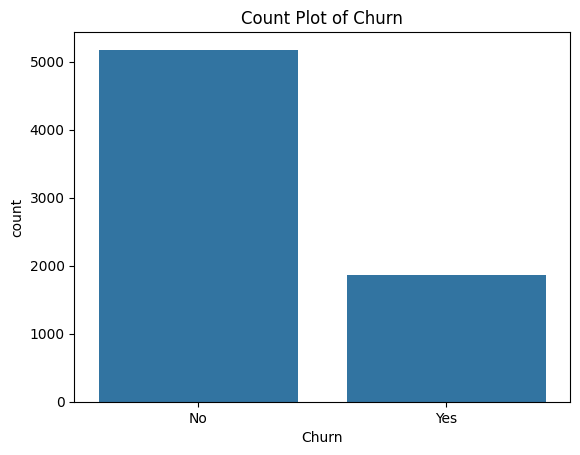

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn',data=data)
plt.title('Count Plot of Churn')
plt.show()

In [ ]:
data.drop('customerID',axis=1,inplace=True)

## Separating Numeric and Categorical Features

In data preprocessing, it is important to handle numeric and categorical features differently. Numeric features often require scaling or normalization, while categorical features may need encoding.

The select_dtypes() function can be used to separate columns by their data types:

- Selecting **categorical columns** (usually of type object) for encoding or analysis.
- Selecting **numeric columns** for scaling or other numeric operations.



In [ ]:
char_feature = data.select_dtypes(include='object')
char_feature

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [ ]:
numeric_feature = data.select_dtypes(include='number')
numeric_feature

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


## Label Encoding for Categorical Features

Machine learning models typically require numerical input. Therefore, categorical features need to be converted into numeric form before training.

**Label Encoding** is a simple technique that converts each unique category in a column into an integer value. This is especially useful for ordinal variables or categorical variables with no inherent order but a limited number of categories.

After separating categorical columns, Label Encoding can be applied to transform these features into numeric values compatible with machine learning algorithms.




In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in char_feature.columns:
  char_feature[col] = le.fit_transform(char_feature[col])


In [ ]:
char_feature

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1


In [ ]:
char_feature.dtypes

,0
gender,int64
Partner,int64
Dependents,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64
TechSupport,int64


## Combining Numeric and Encoded Categorical Data

After applying Label Encoding to categorical features and isolating numeric features, it is necessary to combine them back into a single dataset for model training.

The pd.concat() function is used to concatenate DataFrames along a particular axis. Here, numeric and encoded categorical DataFrames can be combined column-wise (axis=1) to form the complete processed dataset.



In [ ]:
new_data = pd.concat([numeric_feature,char_feature],axis=1)
new_data

,SeniorCitizen,tenure,MonthlyCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,0,34,56.95,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,0,2,53.85,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,0,45,42.30,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,2,70.70,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0
7039,0,72,103.20,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0
7040,0,11,29.60,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0
7041,1,4,74.40,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1


## Correlation Heatmap

A correlation heatmap visually represents the pairwise correlations between numeric features in the dataset. Correlation values range from -1 to 1:

- **1** indicates a perfect positive correlation,
- **-1** indicates a perfect negative correlation,
- **0** indicates no correlation.

Analyzing the correlation heatmap helps identify:

- Strongly correlated features (which may cause redundancy),
- Potential multicollinearity issues,
- Features that have strong relationships with the target variable.




<Axes: >

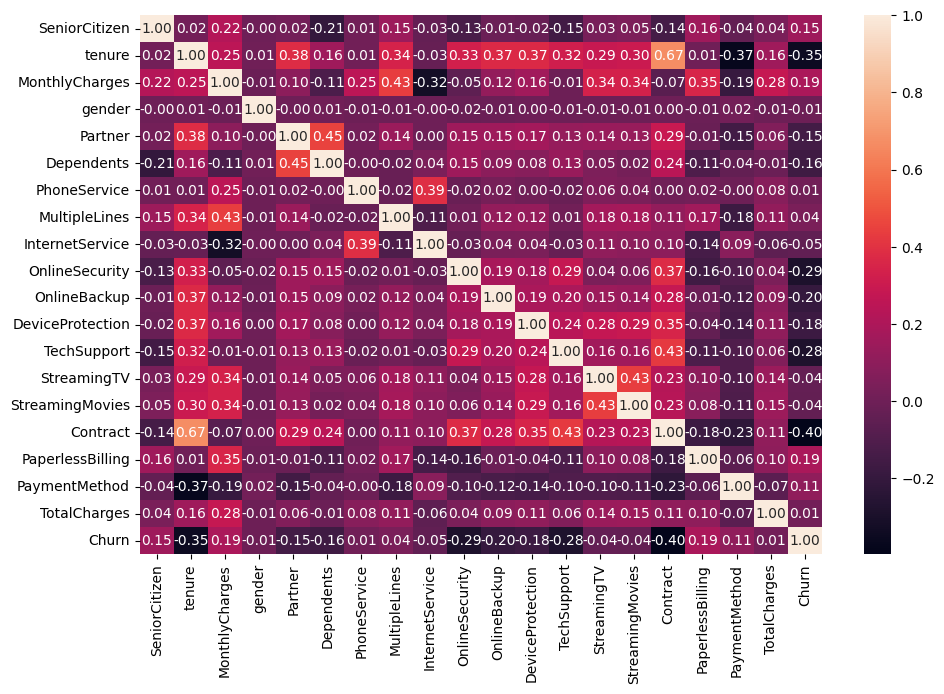

In [ ]:
plt.figure(figsize=(11,7))
sns.heatmap(new_data.corr(), annot = True, fmt = '.2f')

## Splitting the Dataset into Features and Target

Before training a machine learning model, the dataset needs to be separated into:

- **Features (X):** The input variables used for prediction.
- **Target (y):** The output variable to be predicted.

After separating, the data is split into **training** and **testing** sets. The training set is used to train the model, while the testing set evaluates its performance on unseen data.




In [ ]:
X = new_data.iloc[:,:-1]
y = new_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training XGBoost Classifier with Imbalanced Data Handling

 The XGBoost classifier is trained to predict customer churn while addressing the issue of class imbalance.

- **Class imbalance** occurs when one class (e.g., non-churners) significantly outnumbers the other (churners). This can cause the model to be biased towards the majority class.
- To mitigate this, the scale_pos_weight parameter is set as the ratio of negative to positive samples (neg / pos). This helps the model give more attention to the minority class during training.


## Explanation of XGBoost Hyperparameters

When training an XGBoost model, tuning hyperparameters is essential to achieve good performance and avoid overfitting or underfitting. Here are the main hyperparameters used in this model:

- **scale_pos_weight**  
  This parameter helps address class imbalance by scaling the gradient for the positive class. It is set to the ratio of negative to positive samples (neg / pos).  
  A higher value tells the model to pay more attention to the minority class, improving recall and F1-score for imbalanced datasets.

- **n_estimators**  
  This defines the number of decision trees (boosting rounds) to build. More trees can increase model complexity and accuracy but may lead to overfitting.  
  Here, it is set to 50 to balance performance and training time.

- **eval_metric**  
  Specifies the metric used to evaluate the model during training.  
  - 'logloss' (logarithmic loss) measures the difference between predicted probabilities and actual class labels. It is suitable for binary classification and encourages well-calibrated probabilities.

- **max_depth**  
  Controls the maximum depth of each individual tree. Deeper trees can capture more complex patterns but also increase the risk of overfitting.  
  Setting max_depth=3 restricts trees to a shallow depth, helping generalization.

### Summary
Tuning these parameters helps control the model’s complexity, handle data imbalance, and optimize predictive performance.



In [ ]:
import xgboost as xgb

neg, pos = 5174, 1869
scale_pos_weight = neg / pos

model = xgb.XGBClassifier(scale_pos_weight = scale_pos_weight, n_estimators=50, eval_metric = 'logloss', max_depth = 3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, ..., 0, 0, 1])

Accuracy Score: 75.94038325053229
Confusion Matrix:
 [[764 272]
 [ 67 306]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



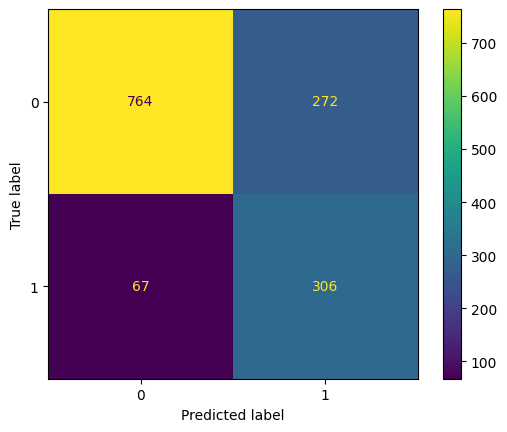

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
accuracy=accuracy_score(y_test,y_predict)*100
print('Accuracy Score:',accuracy)
cm=confusion_matrix(y_test,y_predict)
print('Confusion Matrix:\n',cm)
cr=classification_report(y_test,y_predict)
print('Classification Report:\n',cr)
cmd=ConfusionMatrixDisplay.from_predictions(y_test,y_predict)
print(cmd)

In [ ]:
train_predict=model.predict(X_train)
train_accuracy=accuracy_score(y_train,train_predict)
print('train accuracy:',train_accuracy)

test_predict=model.predict(X_test)
test_accuracy=accuracy_score(y_test,test_predict)
print('test accuracy:',test_accuracy)

train accuracy: 0.7800851970181044
test accuracy: 0.759403832505323


## Model Evaluation and Conclusion

The XGBoost classifier achieved an overall **accuracy** of approximately **75.94%** on the test set, indicating a reasonably good ability to correctly classify customer churn.

### Detailed Performance:
- The **confusion matrix** shows the model correctly identified 764 non-churners and 306 churners, with some misclassifications (272 false positives and 67 false negatives).
- **Precision** for the non-churn class is high (0.92), meaning most predicted non-churners were correct.
- For the churn class, precision is lower (0.53), indicating more false positives.
- **Recall** for the churn class is relatively high (0.82), showing the model is good at identifying actual churners.
- The **F1-score** balances precision and recall, with scores of 0.82 for non-churners and 0.64 for churners.

### Interpretation:
- The model performs better at identifying non-churners than churners, which is common in imbalanced datasets.
- High recall on the churn class is beneficial for the business, as it helps catch most customers likely to leave.
- There is room for improvement in precision for the churn class to reduce false alarms.

### Summary:
- **Train accuracy:** ~78.0%
- **Test accuracy:** ~75.9%

These results suggest the model generalizes reasonably well with only a slight drop in accuracy from training to testing. Further tuning or advanced techniques could improve precision and overall performance, especially on the minority (churn) class.
